<a href="https://colab.research.google.com/github/Tj-dev-py/Machine-Learning-Projects/blob/main/Flower_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
data_dir = '/content/drive/MyDrive/Flowers Recognition Images'

In [ ]:
batch_size = 32
image_height = 180
image_width = 180

In [ ]:
train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = .2,
    subset='training',
    seed=42,
    image_size=(image_height, image_width),
    batch_size = batch_size
)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [ ]:
val = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = .2,
    subset='validation',
    seed=42,
    image_size=(image_height, image_width),
    batch_size = batch_size
)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [ ]:
class_names = train.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
import matplotlib.pyplot as plt

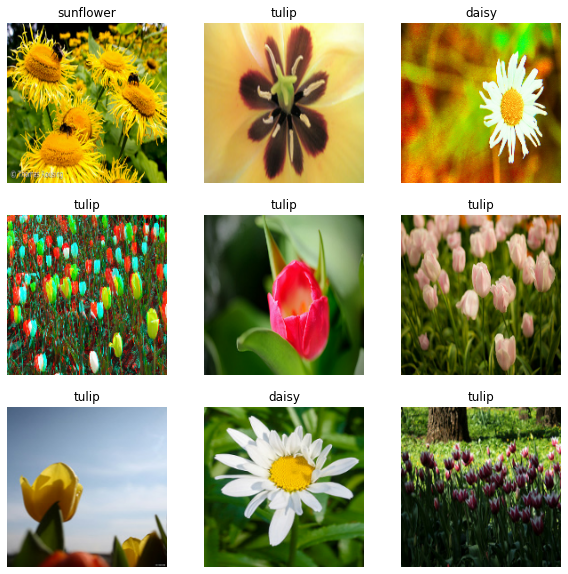

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [ ]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 5

In [ ]:
data_augmentation = keras.Sequential([
                                      keras.layers.RandomFlip(input_shape=(image_height, image_width, 3)),
                                      keras.layers.RandomRotation(.1),
                                      keras.layers.RandomZoom(.1)
])

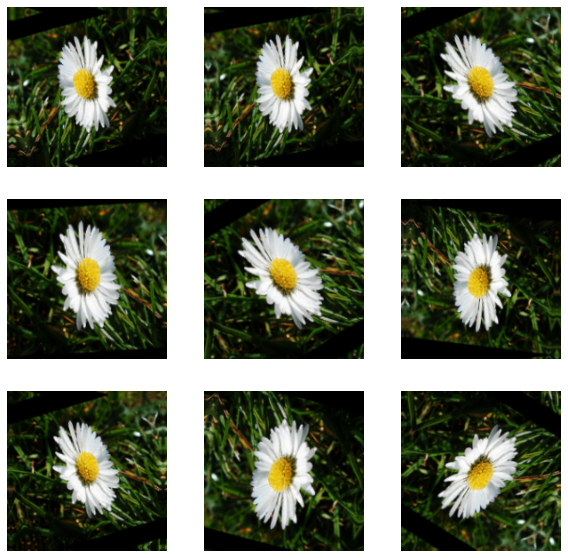

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = keras.Sequential([
                          # Data augmentation, Standardization
                          data_augmentation,
                          keras.layers.Rescaling(1./255),

                          # First Block
                          keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
                          keras.layers.MaxPooling2D(),

                          # Second Block
                          keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
                          keras.layers.MaxPooling2D(),

                          # Third Block
                          keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
                          keras.layers.MaxPooling2D(),

                          # Head
                          keras.layers.Dropout(.2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 64)       

In [ ]:
epochs = 100
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs,
  callbacks=[tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.1,
    patience=10,
    restore_best_weights=True,
  )]
)

Epoch 1/100
108/108 [==============================] - 180s 2s/step - loss: 1.3670 - accuracy: 0.3862 - val_loss: 1.0784 - val_accuracy: 0.5342
Epoch 2/100
108/108 [==============================] - 124s 1s/step - loss: 1.1115 - accuracy: 0.5469 - val_loss: 1.0139 - val_accuracy: 0.5736
Epoch 3/100
108/108 [==============================] - 125s 1s/step - loss: 1.0155 - accuracy: 0.5958 - val_loss: 0.9220 - val_accuracy: 0.6385
Epoch 4/100
108/108 [==============================] - 126s 1s/step - loss: 0.9581 - accuracy: 0.6233 - val_loss: 0.9121 - val_accuracy: 0.6431
Epoch 5/100
108/108 [==============================] - 127s 1s/step - loss: 0.8983 - accuracy: 0.6526 - val_loss: 0.8944 - val_accuracy: 0.6547
Epoch 6/100
108/108 [==============================] - 126s 1s/step - loss: 0.8717 - accuracy: 0.6587 - val_loss: 0.8641 - val_accuracy: 0.6559
Epoch 7/100
108/108 [==============================] - 125s 1s/step - loss: 0.8321 - accuracy: 0.6728 - val_loss: 0.8099 - val_accuracy:

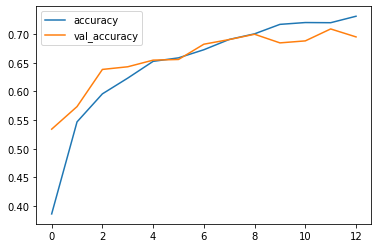

In [ ]:
import pandas as pd

history_df = pd.DataFrame(history.history)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

history_df[['accuracy', 'val_accuracy']].plot()

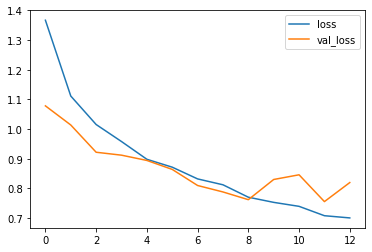

In [ ]:
history_df[['loss', 'val_loss']].plot()

In [ ]:
import numpy as np

sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(image_height, image_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to tulip with a 56.61 percent confidence.
